### Airline Satisfaction 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data
test = pd.read_csv('./data/test.csv')
train = pd.read_csv('./data/train.csv')

# concatenate data
df = pd.concat([train, test], ignore_index=True)

In [3]:
df.shape

(129880, 25)

In [4]:
df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
id,70172,5047,110028,24026,119299
Gender,Male,Male,Female,Female,Male
Customer Type,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer,Loyal Customer
Age,13,25,26,25,61
Type of Travel,Personal Travel,Business travel,Business travel,Business travel,Business travel
Class,Eco Plus,Business,Business,Business,Business
Flight Distance,460,235,1142,562,214
Inflight wifi service,3,3,2,2,3
Departure/Arrival time convenient,4,2,2,5,3


In [5]:
# drop non-useful columns
df = df.drop(columns=['Unnamed: 0', 'id'])

In [6]:
# format column headers
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   gender                             129880 non-null  object 
 1   customer_type                      129880 non-null  object 
 2   age                                129880 non-null  int64  
 3   type_of_travel                     129880 non-null  object 
 4   class                              129880 non-null  object 
 5   flight_distance                    129880 non-null  int64  
 6   inflight_wifi_service              129880 non-null  int64  
 7   departure/arrival_time_convenient  129880 non-null  int64  
 8   ease_of_online_booking             129880 non-null  int64  
 9   gate_location                      129880 non-null  int64  
 10  food_and_drink                     129880 non-null  int64  
 11  online_boarding                    1298

In [9]:
# calculate percentage of null values
round(df.isnull().sum()/len(df)*100, 2)

gender                               0.0
customer_type                        0.0
age                                  0.0
type_of_travel                       0.0
class                                0.0
flight_distance                      0.0
inflight_wifi_service                0.0
departure/arrival_time_convenient    0.0
ease_of_online_booking               0.0
gate_location                        0.0
food_and_drink                       0.0
online_boarding                      0.0
seat_comfort                         0.0
inflight_entertainment               0.0
on-board_service                     0.0
leg_room_service                     0.0
baggage_handling                     0.0
checkin_service                      0.0
inflight_service                     0.0
cleanliness                          0.0
departure_delay_in_minutes           0.0
arrival_delay_in_minutes             0.3
satisfaction                         0.0
dtype: float64

In [10]:
# drop null values
df = df.dropna()

In [11]:
df.describe().round(2)

,age,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
count,129487.00,129487.00,129487.00,129487.00,129487.00,129487.00,129487.00,129487.00,129487.00,129487.00,129487.00,129487.00,129487.00,129487.00,129487.00,129487.00,129487.00,129487.00
mean,39.43,1190.21,2.73,3.06,2.76,2.98,3.20,3.25,3.44,3.36,3.38,3.35,3.63,3.31,3.64,3.29,14.64,15.09
std,15.12,997.56,1.33,1.53,1.40,1.28,1.33,1.35,1.32,1.33,1.29,1.32,1.18,1.27,1.18,1.31,37.93,38.47
min,7.00,31.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,27.00,414.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,3.00,3.00,2.00,0.00,0.00
50%,40.00,844.00,3.00,3.00,3.00,3.00,3.00,3.00,4.00,4.00,4.00,4.00,4.00,3.00,4.00,3.00,0.00,0.00
75%,51.00,1744.00,4.00,4.00,4.00,4.00,4.00,4.00,5.00,4.00,4.00,4.00,5.00,4.00,5.00,4.00,12.00,13.00
max,85.00,4983.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1592.00,1584.00


In [12]:
# convert arrival_delay_in_minutes to correct datatype
df.arrival_delay_in_minutes = df.arrival_delay_in_minutes.astype('int64')

### EDA

In [13]:
sns.set_style('darkgrid')

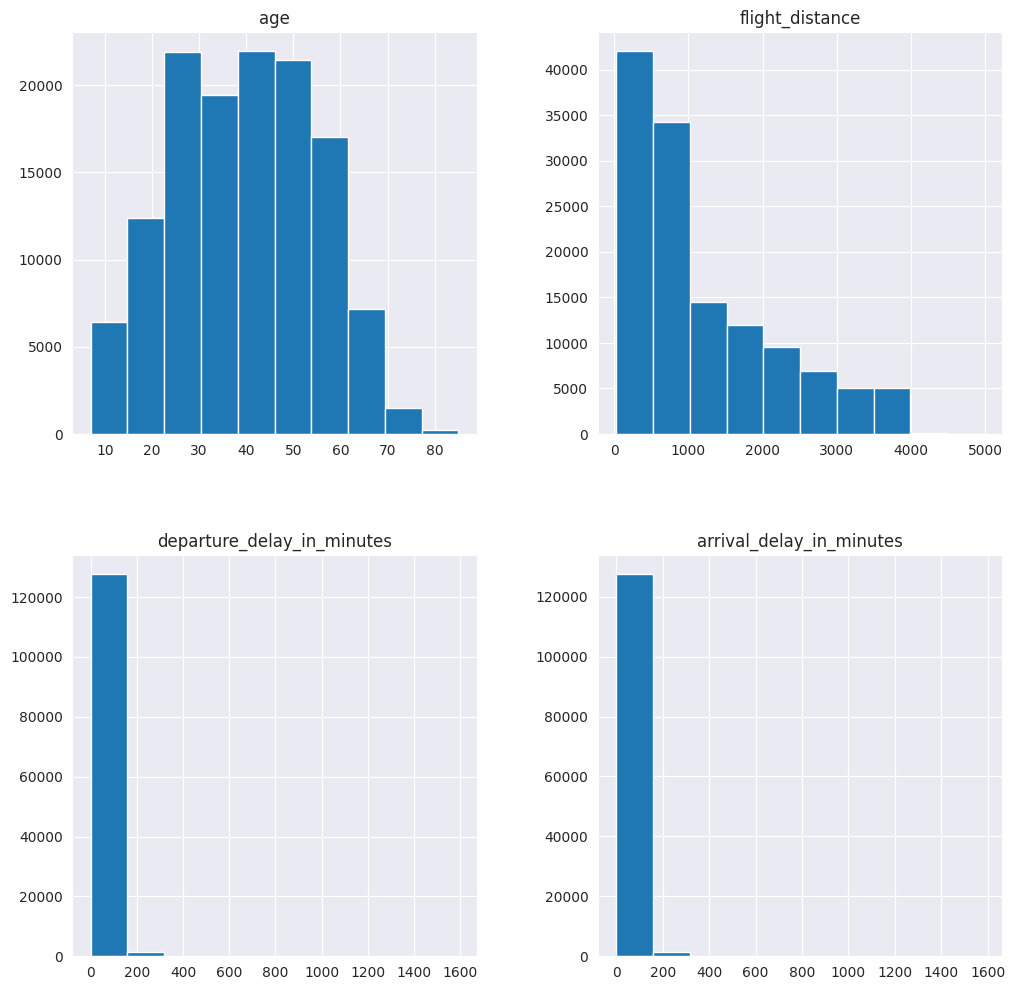

In [ ]:
fig = df[['age', 'flight_distance', 'departure_delay_in_minutes', 'arrival_delay_in_minutes']].hist(figsize=[12,12]);

Statistics for Arrival Delay In Minutes:
count    56734.000000
mean        34.443279
std         52.062016
min          1.000000
25%          6.000000
50%         17.000000
75%         41.000000
max       1584.000000
Name: arrival_delay_in_minutes, dtype: float64
Statistics for Departure Delay In Minutes:
count    56278.000000
mean        33.692171
std         51.661585
min          1.000000
25%          6.000000
50%         16.000000
75%         40.000000
max       1592.000000
Name: departure_delay_in_minutes, dtype: float64


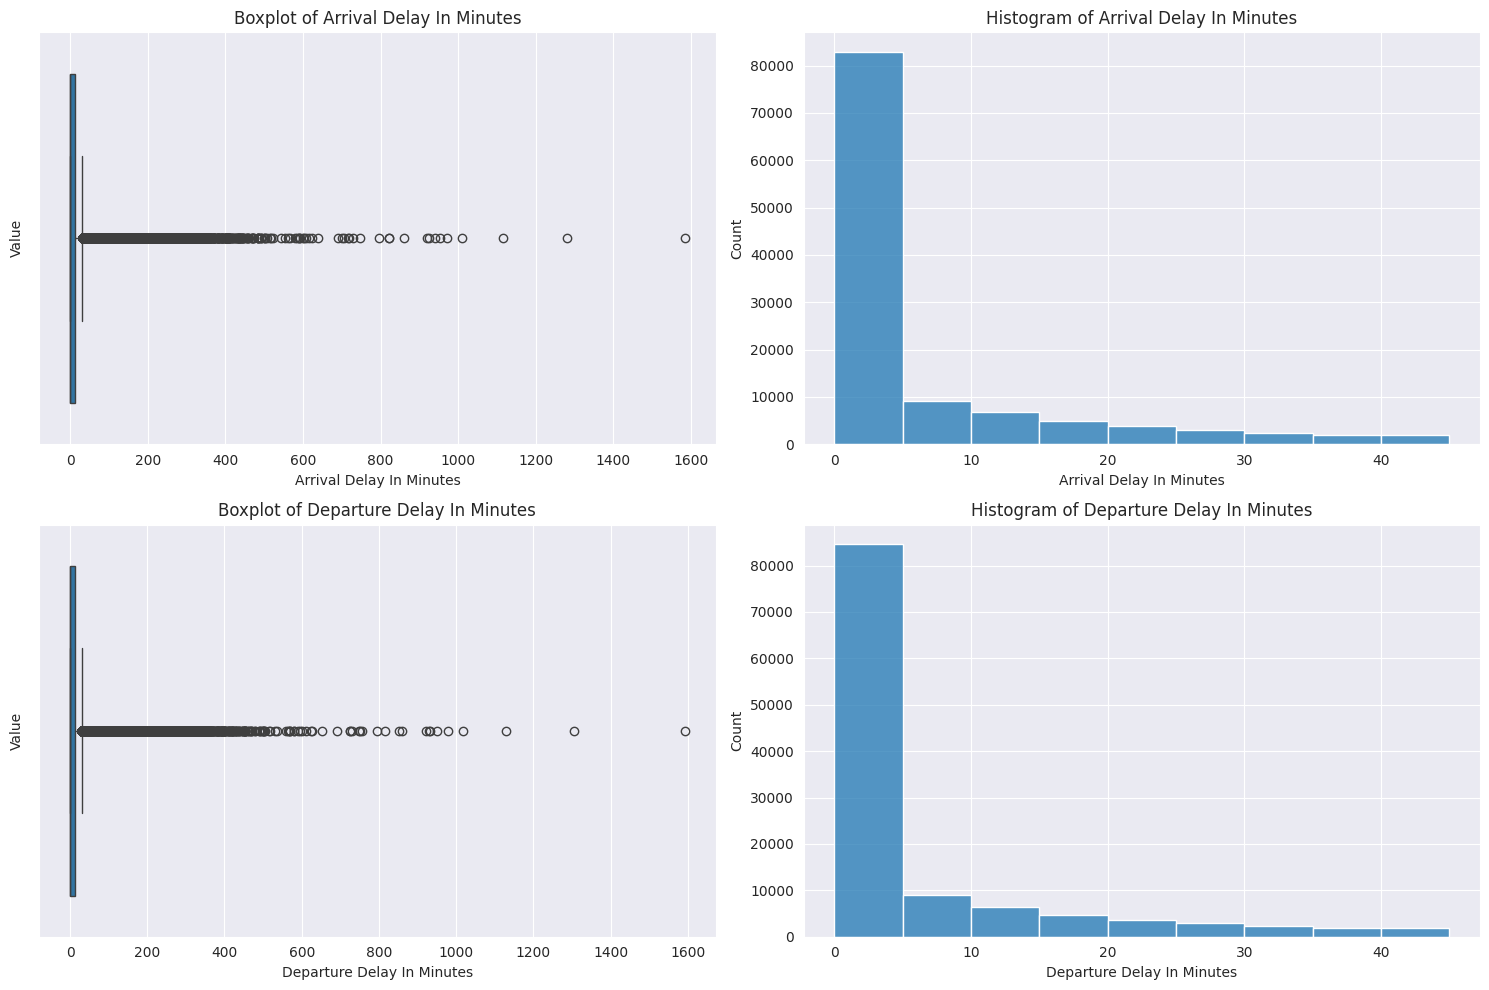

In [ ]:
columns = ['arrival_delay_in_minutes', 'departure_delay_in_minutes']
# create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# flatten the axes for easy iteration
axes = axes.flatten()

for i, col in enumerate(columns):
    # print descriptive statistics for non-zero values
    print(f"Statistics for {col.replace('_', ' ').title()}:")
    print(df[col][df[col] != 0].describe())
    print('==========')

    # Boxplot
    sns.boxplot(data=df, x=col, ax=axes[2 * i])
    axes[2 * i].set_title(f"Boxplot of {col.replace('_', ' ').title()}")
    axes[2 * i].set_xlabel(col.replace('_', ' ').title())
    axes[2 * i].set_ylabel("Value")

    # Histplot
    sns.histplot(data=df, x=col, ax=axes[2 * i + 1], bins=np.arange(0, 50, 5))
    axes[2 * i + 1].set_title(f"Histogram of {col.replace('_', ' ').title()}")
    axes[2 * i + 1].set_xlabel(col.replace('_', ' ').title())
    axes[2 * i + 1].set_ylabel("Count")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [69]:
# seperate into numeric and categegorical column
numeric_columns = df.select_dtypes(include=['int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

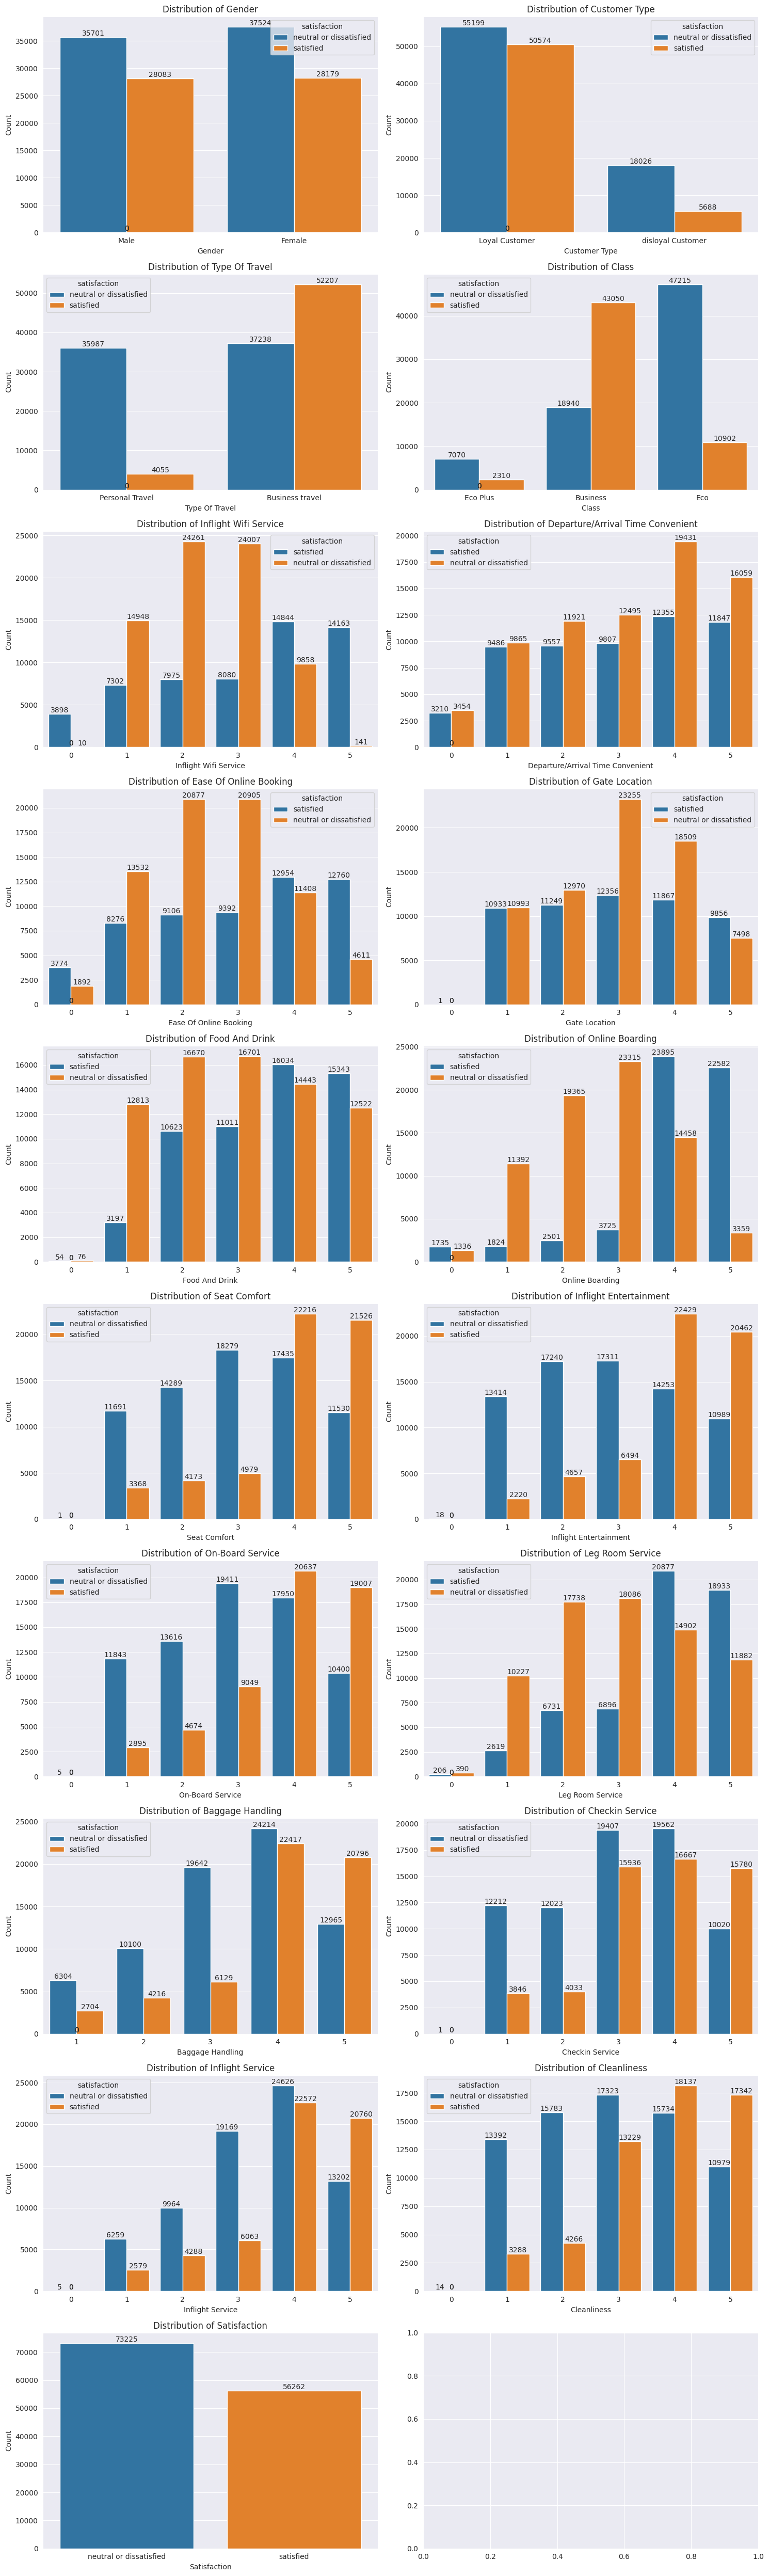

In [ ]:

# exclude specific columns
excluded_columns = ['age', 'flight_distance', 'departure_delay_in_minutes', 'arrival_delay_in_minutes']
columns = [col for col in df.columns if col not in excluded_columns]

# calculate the number of rows required for 2-column layout
n_rows = int(np.ceil(len(columns) / 2))

# create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(15, n_rows * 5))

axes = axes.flatten()

for ax, col in zip(axes, columns):
    sns.countplot(data=df, x=col, ax=ax, hue='satisfaction')
    ax.set_title(f"Distribution of {col.replace('_', ' ').title()}")
    ax.set_xlabel(col.replace('_', ' ').title())
    ax.set_ylabel("Count")

   # adding annotations on the bars
    for bar in ax.patches:
        ax.annotate(
            text=int(bar.get_height()) ,
            xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
            ha='center',
            va='bottom'
        )

# adjust layout for better readability
plt.tight_layout()
plt.show()

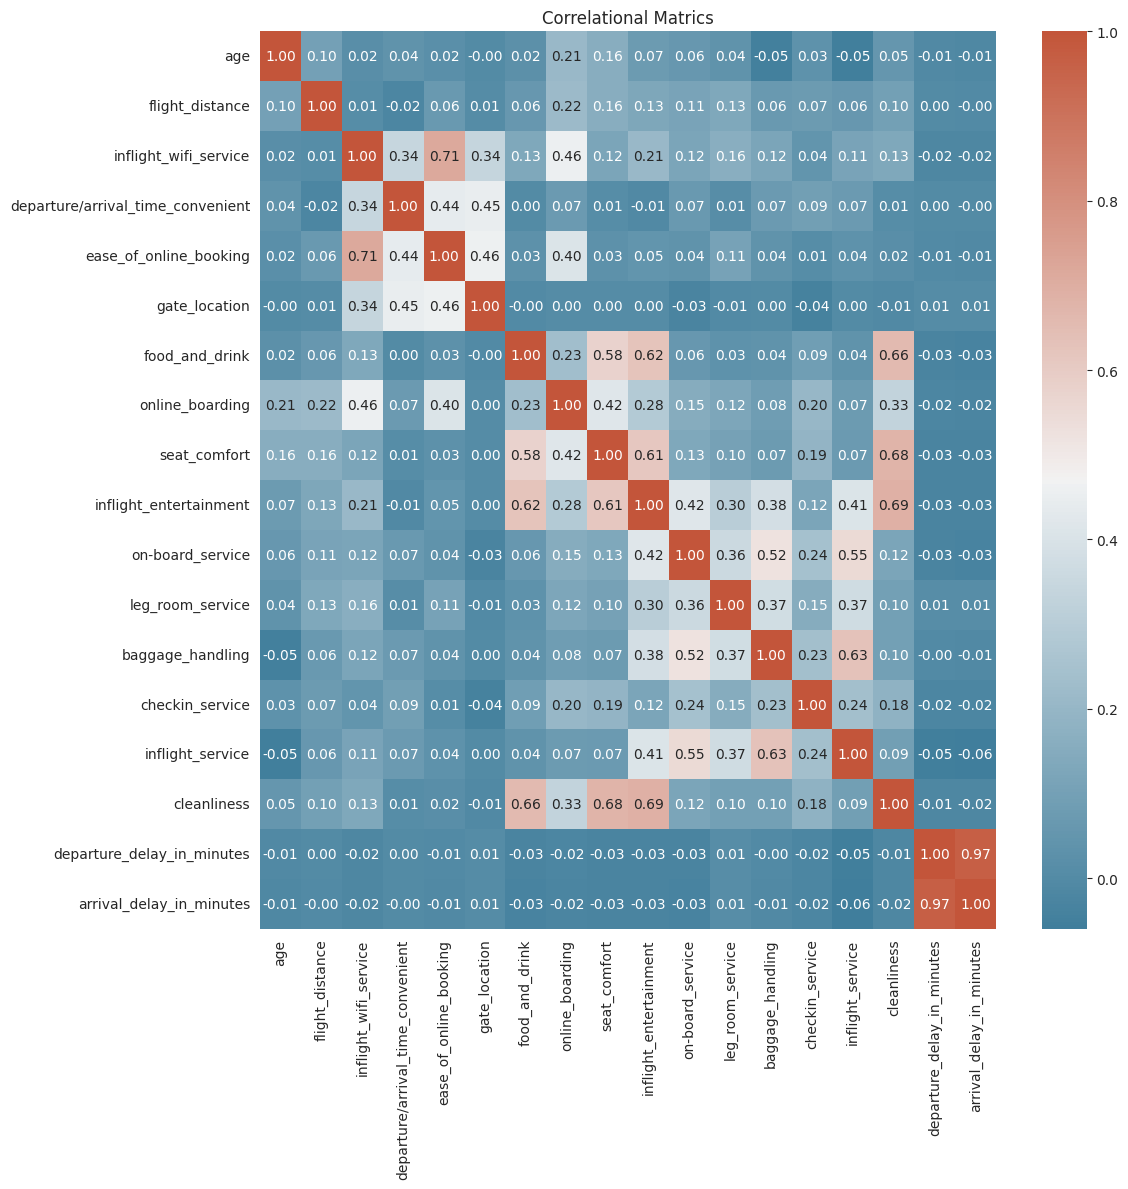

In [ ]:
# correlational Matrics
plt.figure(figsize=[12,12])
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df[df.select_dtypes(include=['int64']).columns].corr(), annot=True, cmap=cmap, fmt='.2f')
plt.title('Correlational Matrics');

### Machine Learning

In [80]:
# convert the target column into binary
df['satisfaction'] = (df['satisfaction']== 'satisfied').astype(int)

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score,  mutual_info_score
from sklearn.tree import export_text

In [86]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.satisfaction.values
y_val = df_val.satisfaction.values
y_test = df_test.satisfaction.values

del df_train['satisfaction']
del df_val['satisfaction']
del df_test['satisfaction']

In [87]:
len(df_train), len(df_val), len(df_test)

(77691, 25898, 25898)

#### Feature importance: Mutual information and Correlation

In [101]:
def mui_score(series):
    return mutual_info_score(series, df_full_train.satisfaction)

In [105]:
mi = df_full_train[[c for c in categorical_columns if c != 'satisfaction']].apply(mui_score)
mi.sort_values(ascending=False)

class             0.132425
type_of_travel    0.113602
customer_type     0.018609
gender            0.000083
dtype: float64

In [ ]:
df_full_train[numeric_columns].corrwith(df_full_train.satisfaction).abs().sort_values(ascending=False)

online_boarding                      0.502095
inflight_entertainment               0.399811
seat_comfort                         0.347229
on-board_service                     0.323098
leg_room_service                     0.314005
cleanliness                          0.307947
flight_distance                      0.297989
inflight_wifi_service                0.285439
baggage_handling                     0.249416
inflight_service                     0.244820
checkin_service                      0.237842
food_and_drink                       0.212429
ease_of_online_booking               0.171118
age                                  0.132226
arrival_delay_in_minutes             0.058302
departure/arrival_time_convenient    0.053116
departure_delay_in_minutes           0.050277
gate_location                        0.001499
dtype: float64